# Twitter分析

つぶやきを集計して簡単にビジュアライズします。    
各スクリプトはMongoDBに接続可能な状態で実行してください。   

## 時系列分析
過去7日間における時間帯ごとのつぶやき数を集計し、プロットします。  
集計単位は下記のとおりです。  
- 1時間ごと
- 日ごと
- 時間帯別

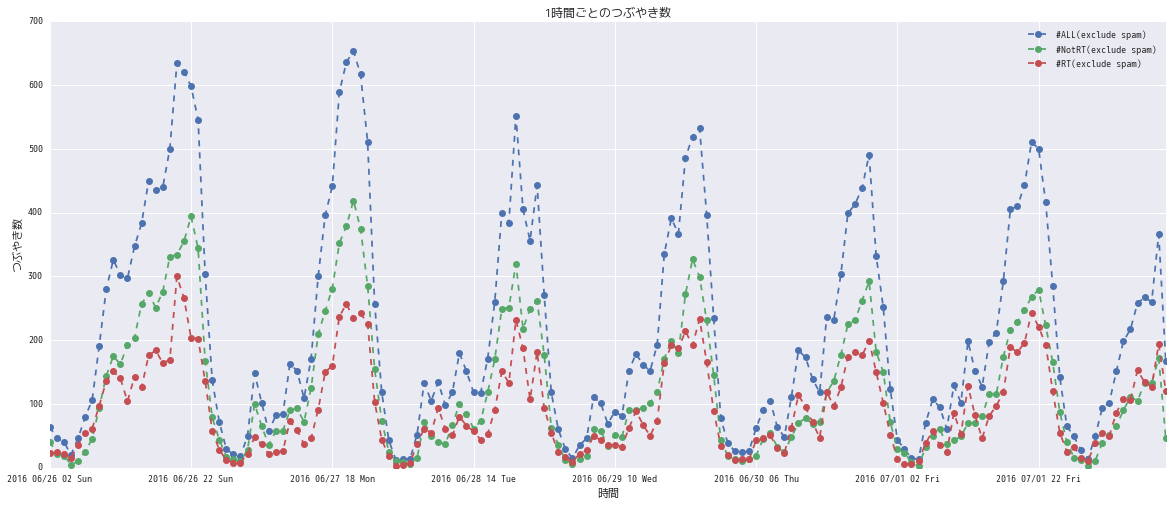

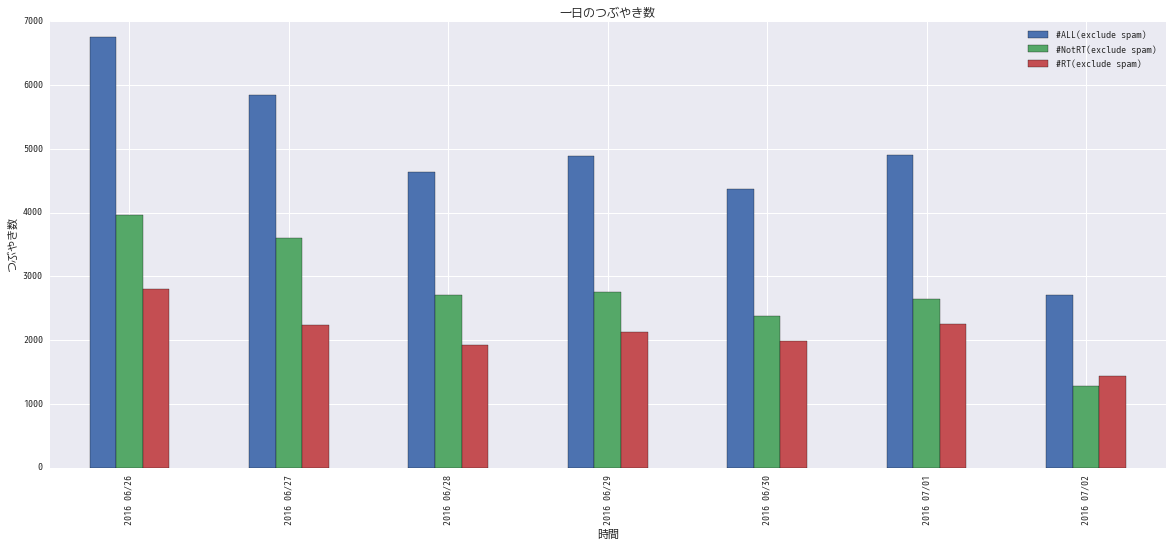

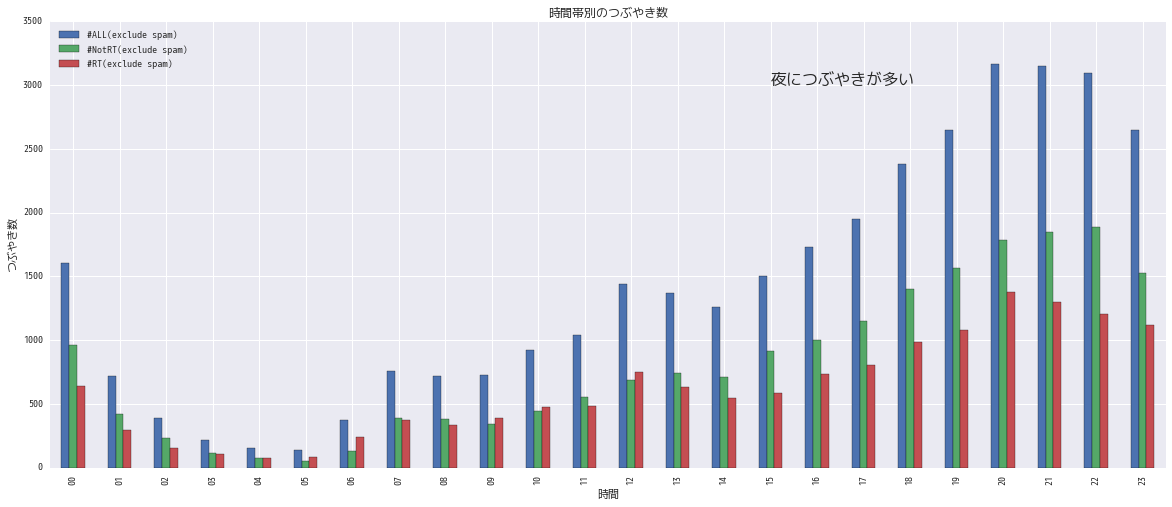

In [18]:
%matplotlib inline
from _datetime import *
import matplotlib.pyplot as plt
import seaborn as sns
from analyzer.time_series import *

plt.rcParams['font.family'] = 'Migu 1M'# 日本語フォントの設定

# ここの部分のコメントアウトを外して実行すると、使用可能な（インストールされている）フォントが表示されます。
# 必要に応じて、適当な日本語フォントに設定し直してださい。
"""
import matplotlib as mpl
font_paths = mpl.font_manager.findSystemFonts()
font_objects = mpl.font_manager.createFontList(font_paths)
font_names = [f.name for f in font_objects]
print(font_names)
"""

today = datetime.today()
condition = {'created_datetime': {'$gte': today - timedelta(days=7), '$lte': today}}# 過去一週間以内の全ツィートを検索対象とする。

# 1時間ごとのつぶやき数
df = get_time_series_data(condition, '%Y %m/%d %H %a')
df.plot(y=['#ALL(exclude spam)', '#NotRT(exclude spam)', '#RT(exclude spam)'], linestyle='dashed', marker='o', figsize=(20, 8))
plt.title('1時間ごとのつぶやき数')
plt.xlabel('時間')
plt.ylabel('つぶやき数')
plt.show()

# 日ごとのつぶやき数
df = get_time_series_data(condition, '%Y %m/%d')
df.plot(kind='bar', y=['#ALL(exclude spam)', '#NotRT(exclude spam)', '#RT(exclude spam)'], figsize=(20, 8))
plt.title('一日のつぶやき数')
plt.xlabel('時間')
plt.ylabel('つぶやき数')
plt.show()

# 時間帯別のつぶやき数
df = get_time_series_data(condition, '%H')
df.plot(kind='bar', y=['#ALL(exclude spam)', '#NotRT(exclude spam)', '#RT(exclude spam)'], figsize=(20, 8))
plt.text(15, 3000, '夜につぶやきが多い', fontsize=16)
plt.title('時間帯別のつぶやき数')
plt.xlabel('時間')
plt.ylabel('つぶやき数')
plt.show()

## 本日のツィート
今日のつぶやき（素データ）を最大1000件表示します。  

In [17]:
import pandas as pd
from pandas import DataFrame

from analyzer.db import *
from analyzer.date_ext import *


# 最大1000ツィートまで表示するように設定。
pd.options.display.max_rows = 1000 

tweet_collection = connect_tweet_collection()
date_format = '%Y/%m/%d %a %H:%M:%S'
today = datetime.today()
condition = {'retweeted_status': {'$eq': None},
             'created_datetime': {'$gte': today - timedelta(days=1), '$lte': today}}# 今日のツィートを検索対象とする。

results = [
    {'日付': date_to_japan_time(tweet['created_datetime']).strftime(date_format),
     'リツィート回数': tweet['retweet_count'],
     'ユーザー名': tweet['user']['screen_name'], 
     'つぶやき': tweet['text']}
    for tweet in tweet_collection.find(condition, {'created_datetime': 1, 'retweet_count': 1, 'id': 1, 'user': 1, 'text': 1})]

DataFrame(results, columns=['日付', 'リツィート回数', 'ユーザー名', 'つぶやき']).sort_values(by='日付', ascending=False).reset_index(drop=True)

,日付,リツィート回数,ユーザー名,つぶやき
0,2016/07/02 Sat 16:22:18,0,mafobeen_0116,流行りのネットプリントやる
1,2016/07/02 Sat 16:21:56,0,Uni_pastel,保健受けてないから自分でプリント埋めないけないんだけど、教科書に書いてないしわかんないしネッ...
2,2016/07/02 Sat 16:21:50,0,ncm51591902,ネットプリントのじゃらし年中の方は今日までなんですね。プリントして下さった皆様ありがとうござ...
3,2016/07/02 Sat 16:21:32,0,_hoshi38,卍固めのネットプリントとか需要ある？
4,2016/07/02 Sat 16:21:12,0,_hoshi38,ネットプリントかー。アナログ絵ばっかなんだよなぁ
5,2016/07/02 Sat 16:20:09,0,reirei828,ネットプリント楽しい
6,2016/07/02 Sat 16:18:08,0,r_n_f2f,セブンのネットプリント？ってやつ、すごい気になる…色んな方のを手に入れたい…
7,2016/07/02 Sat 16:16:27,0,WeLearn1743,ネットプリントを貼ろうと文房具店で購入したアルバム\nおそ松さんぽくて迷わず購入（笑）\nあ...
8,2016/07/02 Sat 16:16:16,0,milktea_takane_,今からセブンで実貴のネットプリント試してみるぜよ
9,2016/07/02 Sat 16:15:53,0,yosi218,セブンにアーティさんの悪魔松印刷しに行くぞぉ
